<a href="https://colab.research.google.com/github/edogriba/NAML-2024/blob/main/LAB01_basicsSVD_PCA2D_imgcompression_bgremoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB1

In the first lab we'll see three applications of the SVD (Singular Value Decomposition) of a matrix. We usually write  $ \ {A = U \Sigma V^T} $ to express the SVD of a matrix

## SVD for Image Compression

In [ ]:
# First we make sure we have all the dependencies we need

!pip install numpy
!pip install matplotlib

First of all we load a 3D image with `np.array`

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]

image_path = 'images/TarantulaNebula.jpg'

A = imread(image_path)


Now we visualize the picture

(-0.5, 629.5, 566.5, -0.5)

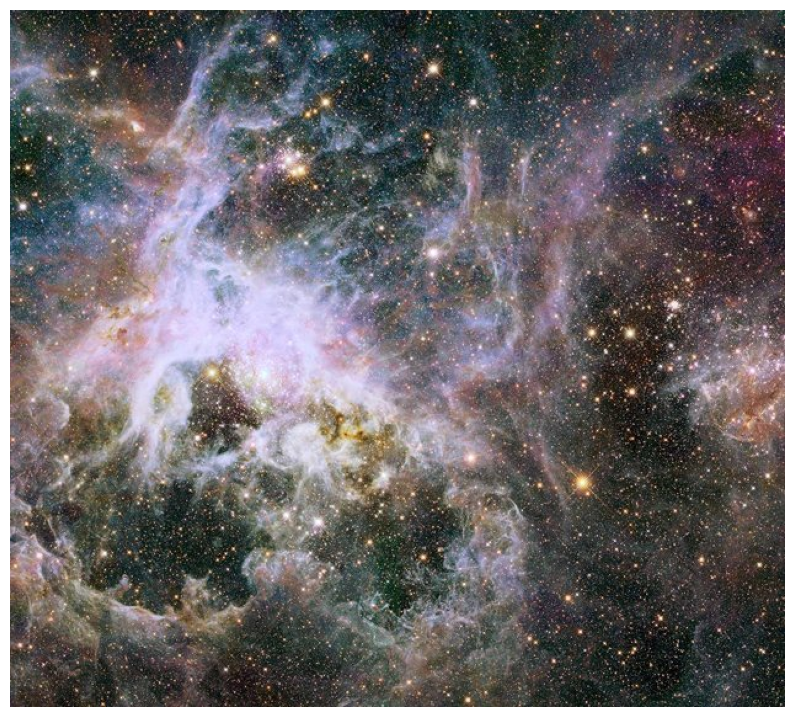

In [ ]:
img = plt.imshow(A)
plt.axis('off')

We convert the picture to gray scale and visualize it


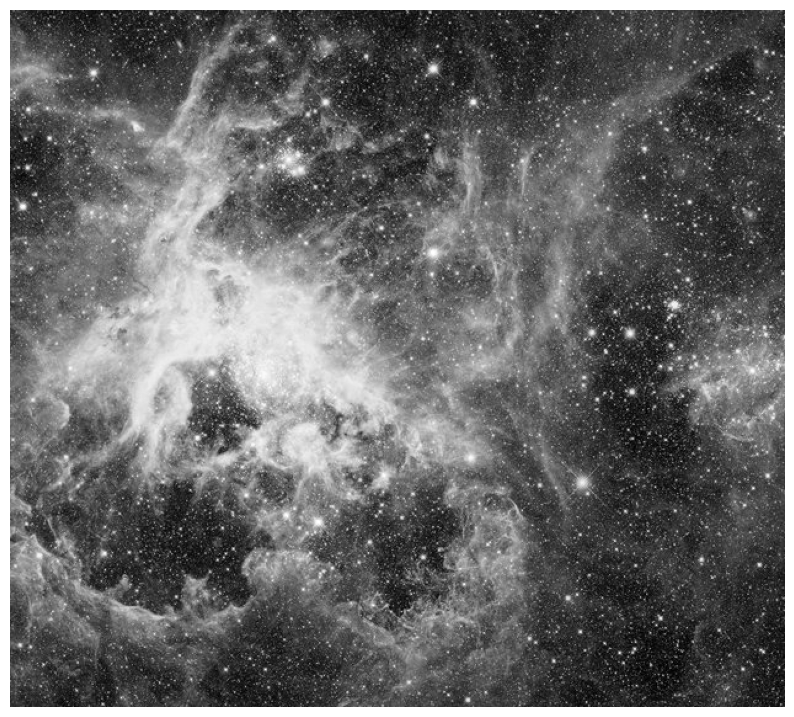

In [ ]:
X = np.mean(A, axis=2)
img = plt.imshow(X, cmap="gray") # Why do I have to take the mean on the third (second starting to count from zero) axis
plt.axis('off')
plt.show()

We get the size of the picture by simply calling the method `.shape` on the matrix

In [ ]:
X.shape

(567, 630)

Now we perform the SVD. We can choose between the economy SVD and the nomral SVD by passing as argument True or False to the full_matrices parameter

In [ ]:
U, s, VT = np.linalg.svd(X, full_matrices=True)
print("Full SVD")
print(f"U shape: {U.shape}")
print(f"s shape: {s.shape}")
print(f"VT shape: {VT.shape}")
U, s, VT = np.linalg.svd(X, full_matrices=False)
print("Economy SVD")
print(f"U shape: {U.shape}")
print(f"s shape: {s.shape}")
print(f"VT shape: {VT.shape}")


Full SVD
U shape: (567, 567)
s shape: (567,)
VT shape: (630, 630)
Economy SVD
U shape: (567, 567)
s shape: (567,)
VT shape: (567, 630)


> Now we plot the trend of the singular values to understand where to cut in order to keep a decent approximation of the matrix.
We will plot:
- the singular values
- the cumulated fraction of the singular values
- the fraction of the "explained variance"

Text(0.5, 1.0, 'Fraction of explained variance')

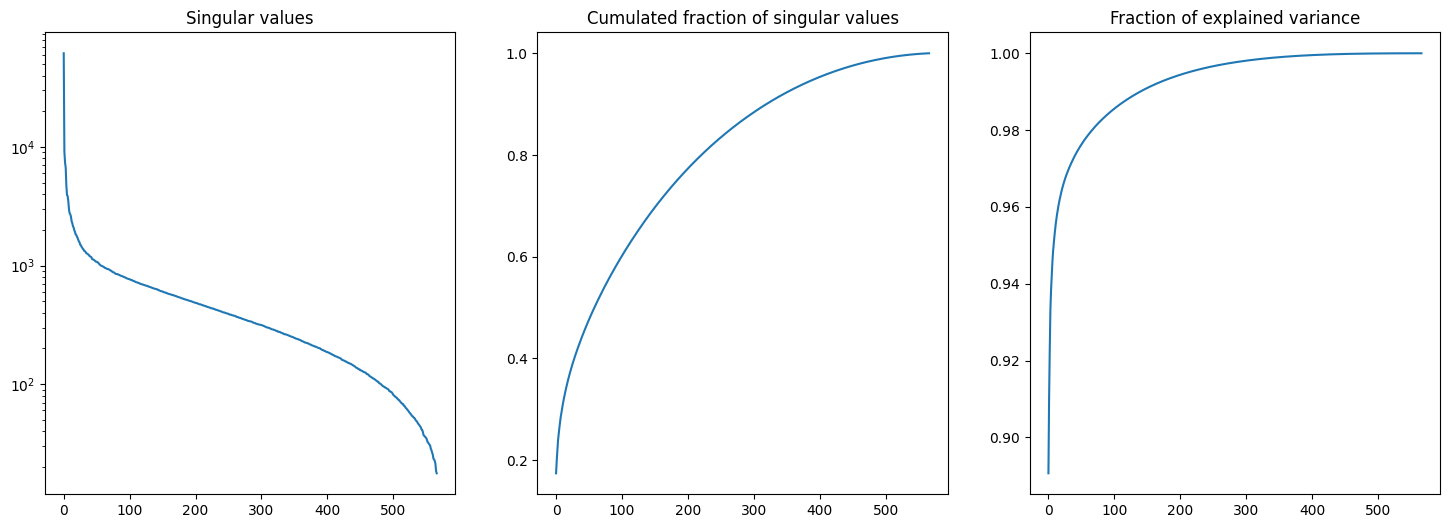

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

axes[0].semilogy(s)
axes[0].set_title("Singular values")

axes[1].plot(np.cumsum(s)/np.sum(s))
axes[1].set_title("Cumulated fraction of singular values")

axes[2].plot(np.cumsum(s**2)/np.sum(s**2))
axes[2].set_title("Fraction of explained variance")

Now we visualize the best rank-k matrices for k = 1, 5, 10, 50, 100, 500.

**REMINDER:** We know that the matrix represents the best k-rank approximating matrix thanks to Eckart-Young theorem

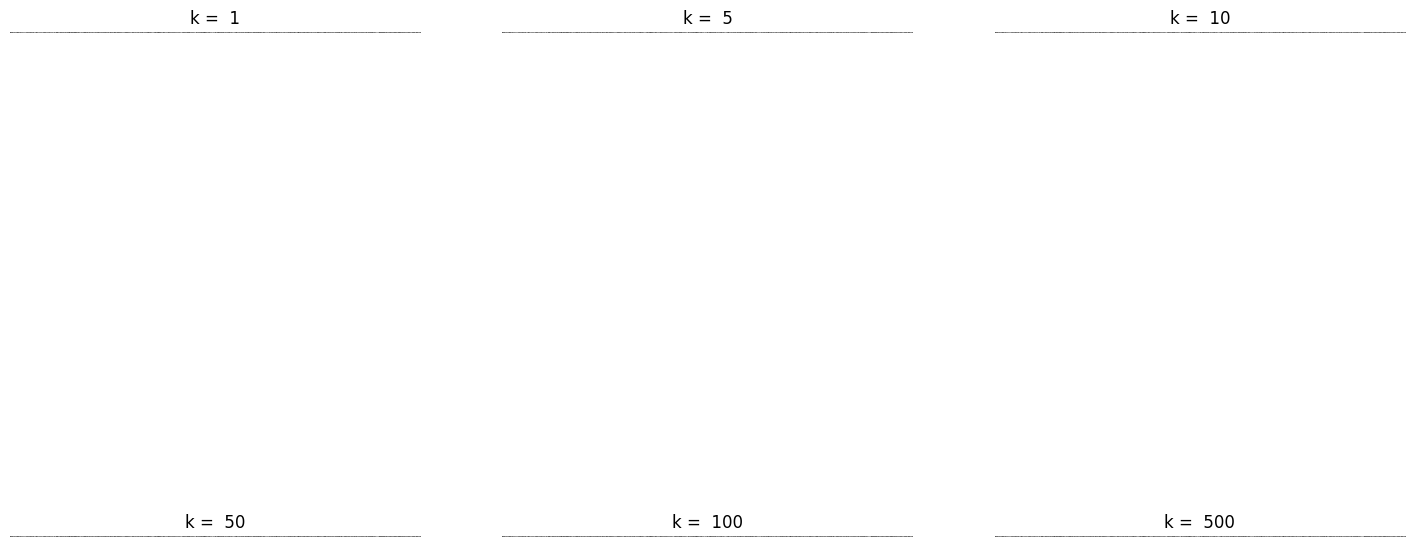

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
axs = axs.reshape((-1,))
indexes = [1, 5, 10, 50, 100, 500]
for i in range(len(indexes)):
  k = indexes[i]
  X_k = np.matmul(U[:, :k], np.matmul(np.diag(s[:k]), VT[:k, :])) # matrix multiplication can be called through np.matmul(A, B) or A @ B natively in python
  axs[i].imshow(X_k, cmap="gray")
  axs[i].set_title(f"k =  {k}")
  axs[i].axis('off')

> The previous image was really complex. We noticed that we have to keep a lot of singular values to have a decent compression of the image.
> What bout a much simpler image?


(-0.5, 719.5, 362.5, -0.5)

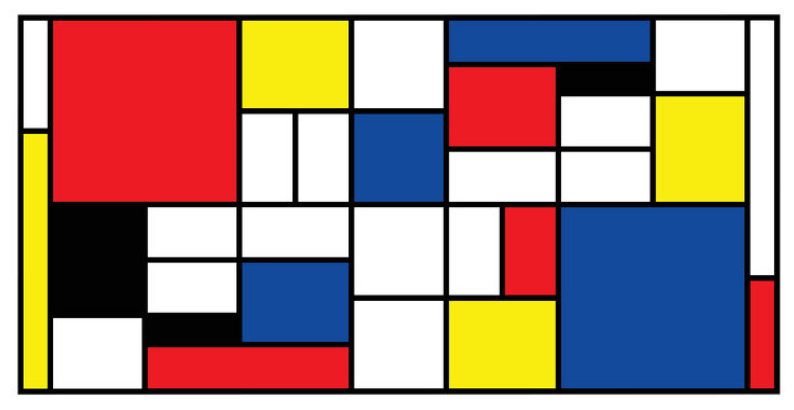

In [ ]:
image_path = 'images/mondrian.jpg'
B = imread(image_path)
plt.imshow(B)
plt.axis('off')

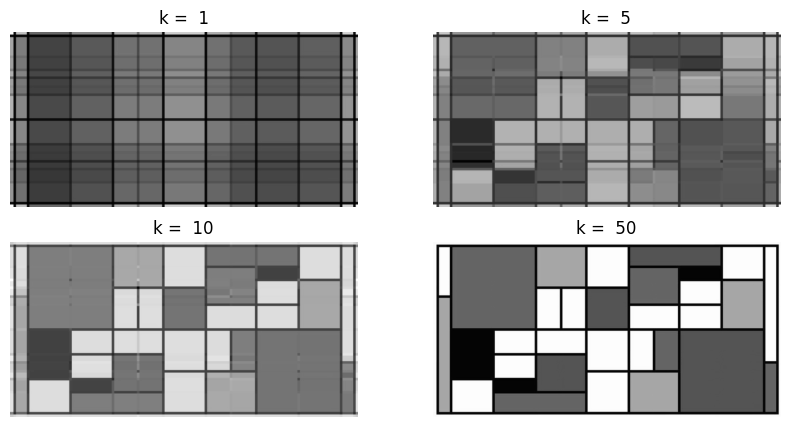

In [ ]:
X = np.mean(B, axis=2)
U, s, VT = np.linalg.svd(X, full_matrices=True)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
axs = axs.reshape((-1,))
indexes = [1, 5, 10, 50]
for i in range(len(indexes)):
  k = indexes[i]
  X_k = np.matmul(U[:, :k], np.matmul(np.diag(s[:k]), VT[:k, :]))
  axs[i].imshow(X_k, cmap="gray")
  axs[i].set_title(f"k =  {k}")
  axs[i].axis('off')

## Principal Component Analysis 2D (PCA 2D)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

Define the unit vector $\mathbf{v}_1 = \begin{pmatrix} \cos(\theta_1) \\ \sin(\theta_1)\end{pmatrix}$
where $\theta = \pi/6$ and a unit vector $\mathbf{v}_2 \perp \mathbf{v}_1$.

In [ ]:
theta1 = np.pi/6
theta2 = theta1 + np.pi/2

v1 = np.array([np.cos(theta1), np.sin(theta1)])
v2 = np.array([np.cos(theta2), np.sin(theta2)])

Define the point $ \mathbf b = \begin{pmatrix} 20 \\ 30 \end{pmatrix} $

In [ ]:
b = np.array([20, 30])
# b = np.array((20, 30)) would be the same

Generate $ n = 1000 $ points $x_i$ according to the formula:

$ x_i = \mathbf b + r_{1,i} \rho_1 \mathbf v_1 + r_{2,i} \rho_2 \mathbf v_2$

Where $\rho_1 = 12, \rho_2 = 3$ and $r_{i,j}$ are real numbers independently generated according to a normal distribution

In [ ]:
rho1 = 12
rho2 = 3
n = 1000

seeds = np.random.randn(2, n)

X = b[:, None] + rho1*np.outer(v1, seeds[0, :]) + rho2*np.outer(v2, seeds[1, :])

X.shape

(2, 1000)

Plot the generated numbers on a plane , showing the directions of $\mathbf v1$ and $\mathbf v2$, rescaled by $\rho_1$ and $\rho_2$ respectively


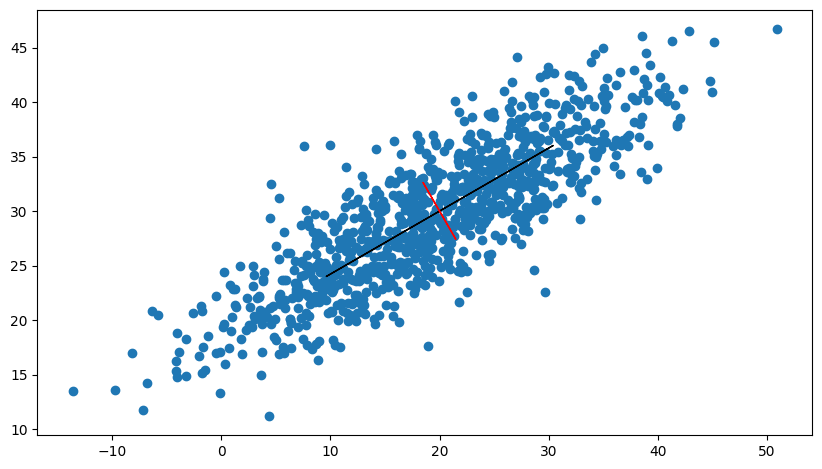

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(X[0, :], X[1, :])
ax.arrow(b[0]-v1[0]*rho1, b[1]-v1[1]*rho1, 2*v1[0]*rho1, 2*v1[1]*rho1, width=0.01, color="black")
ax.arrow(b[0]-v2[0]*rho2, b[1]-v2[1]*rho2, 2*v2[0]*rho2, 2*v2[1]*rho2, width=0.01, color="red")
ax.set_aspect('equal')

So now we perform the PCA on the matrix $X$:

$\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$

$\overline{X} = X - \boldsymbol{\mu} [1,\dots,1]$

$\overline{X} = U \Sigma V^T$

In [ ]:
X_mean = np.mean(X, axis=1)
print(X_mean.shape)
U, s, VT = np.linalg.svd(X-X_mean[:, None], full_matrices=False)

(2,)


Plot the first two singular vectors, rescaled by the root of the sample variance:

${\sqrt{\frac{\sigma_1^2}{(n - 1)}}}{\mathbf{u}_1}, {\sqrt{\frac{\sigma_2^2}{(n - 1)}}}{\mathbf{u}_2}$

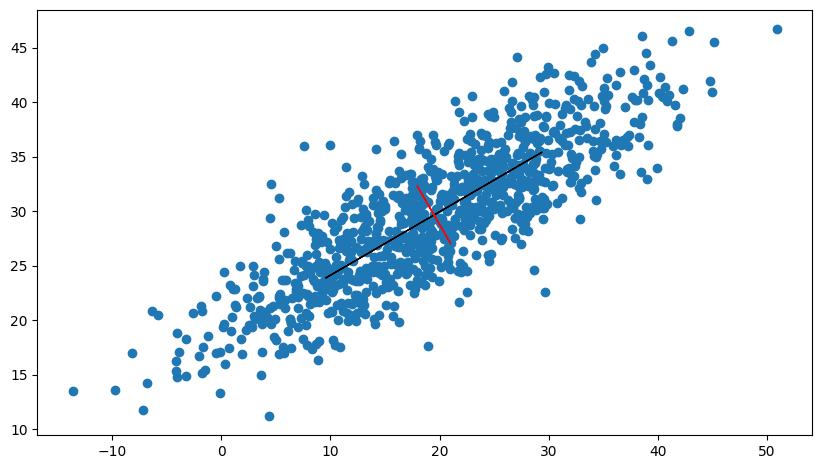

In [ ]:
u1 = U[:, 0]
u2 = U[:, 1]

r = s / np.sqrt(n-1)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[0, :], X[1, :])
plt.arrow(X_mean[0]-u1[0]*r[0], X_mean[1]-u1[1]*r[0], 2*r[0]*u1[0], 2*r[0]*u1[1], width=0.01,color="black")
plt.arrow(X_mean[0]-u2[0]*r[1], X_mean[1]-u2[1]*r[1], 2*r[1]*u2[0], 2*r[1]*u2[1], width=0.01,color="red")
ax.set_aspect('equal')

In [ ]:
v1, v2

(array([0.8660254, 0.5      ]), array([-0.5      ,  0.8660254]))

In [ ]:
u1, u2

(array([-0.86446892, -0.50268628]), array([-0.50268628,  0.86446892]))

Compute the principal components of the data:

$\Phi = U^T \overline{X}$

In [ ]:
Phi = np.matmul(U.transpose(), X - X_mean[:, None])

Make a scatterplot of the two first principal components ($\phi_1$, $\phi_2$)

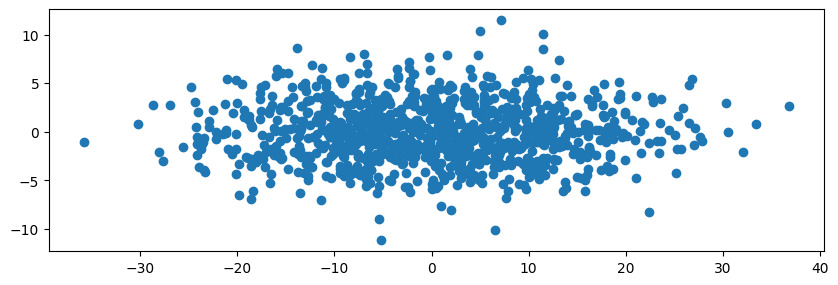

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(Phi[0, :], Phi[1, :])
ax.set_aspect('equal')

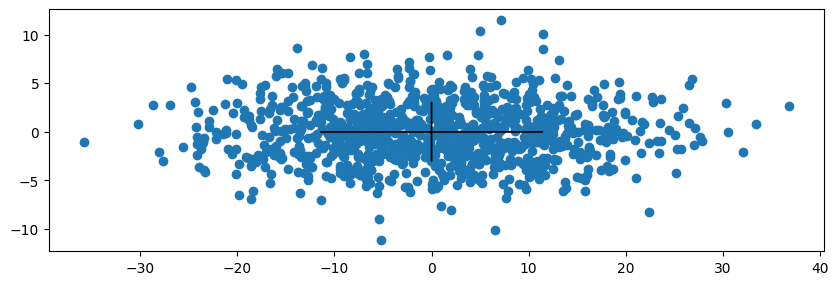

In [ ]:
Phi_mean = np.mean(Phi, axis=1)
U, s, VT = np.linalg.svd(Phi-Phi_mean[:, None], full_matrices=False)

u1 = U[:, 0]
u2 = U[:, 1]

r = s / np.sqrt(n-1)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(Phi[0, :], Phi[1, :])
plt.arrow(Phi_mean[0]-u1[0]*r[0], Phi_mean[1]-u1[1]*r[0], 2*u1[0]*r[0], 2*u1[1]*r[0])
plt.arrow(Phi_mean[0]-u2[0]*r[1], Phi_mean[1]-u2[1]*r[1], 2*u2[0]*r[1], 2*u2[1]*r[1])
ax.set_aspect('equal')


## Background Removal



We aim to remove the background from a video and be able to select only the moving parts using SVD.

We use as benchmark the real video 003 dataset from BMC 2012 [Background Models Challenge Dataset](http://backgroundmodelschallenge.eu/)

In [ ]:
!wget http://backgroundmodelschallenge.eu/data/real/Video_003.zip
!unzip Video_003.zip

--2024-10-13 21:01:29--  http://backgroundmodelschallenge.eu/data/real/Video_003.zip
Resolving backgroundmodelschallenge.eu (backgroundmodelschallenge.eu)... 145.239.37.162, 2001:41d0:301::30
Connecting to backgroundmodelschallenge.eu (backgroundmodelschallenge.eu)|145.239.37.162|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3279920 (3.1M) [application/zip]
Saving to: ‘Video_003.zip’

Video_003.zip       100%[===================>]   3.13M  --.-KB/s    in 0.1s    

2024-10-13 21:01:29 (30.7 MB/s) - ‘Video_003.zip’ saved [3279920/3279920]

Archive:  Video_003.zip
   creating: Video_003/
   creating: Video_003/img/
  inflating: Video_003/img/Img_00250.bmp  
  inflating: Video_003/img/Img_00251.bmp  
  inflating: Video_003/img/Img_00252.bmp  
  inflating: Video_003/img/Img_00350.bmp  
  inflating: Video_003/img/Img_00351.bmp  
  inflating: Video_003/img/Img_00352.bmp  
  inflating: Video_003/img/Img_00450.bmp  
  inflating: Video_003/img/Img_00451.bmp  
  inflati

Import the needed libraries


In [ ]:
import moviepy.editor as mpe
import numpy as np
import skimage.transform

%matplotlib inline
import matplotlib.pyplot as plt


Load the video and check the duration

In [ ]:
video = mpe.VideoFileClip("Video_003/Video_003.avi")
video.duration

113.57

Let's visualize the video andactually check its content

In [ ]:
video.subclip(0, 5).ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


**Helper Methods** \\


In order to work with the video, we need to implement a couple of helper methods:
- a method to tranform a color image into a gray image (SVD works with 2D matrices, thus, for sake of simplicity, we avoid repeating the same operations to each channel of the image by using a gray-scale image)
- a method to transform the video into a numpy matrix, we also downscale the video to reduce the computational cost of applying the SVD. We can unroll a frame into a single tall column. So instead of having a 2D picture, we have a column. This isn't very human-readable, but it's handy because it lets us stack the images from different times on top of one another, to put a video all into 1 matrix.

In [ ]:
def create_data_matrix_from_video(clip, dims):
  number_of_frames = int(clip.duration * clip.fps)
  flatten_gray_frames = []
  for i in range(number_of_frames):
    # get frame takes as input the tima of the frame
    frame = clip.get_frame(i/clip.fps)
    # to gray scale
    gray_frame = np.mean(frame[..., :3], axis=2).astype(int)
    # resize to reduce computational cost
    small_gray_frame = skimage.transform.resize(gray_frame, dims)
    # each frame becomes a column vector of A
    flatten_gray_frames.append(small_gray_frame.flatten())
  return np.array(flatten_gray_frames).T


We set some parameters and create the matrix

In [ ]:
scale = 0.50
width, height = video.size
dims = (int(height * scale), int(width * scale))
A = create_data_matrix_from_video(video, dims)
print(f"A shape: {A.shape}")
print(f"Frame size {dims}")

A shape: (19200, 794)
Frame size (120, 160)


Let's visualize a frame of the rescaled and decolored video

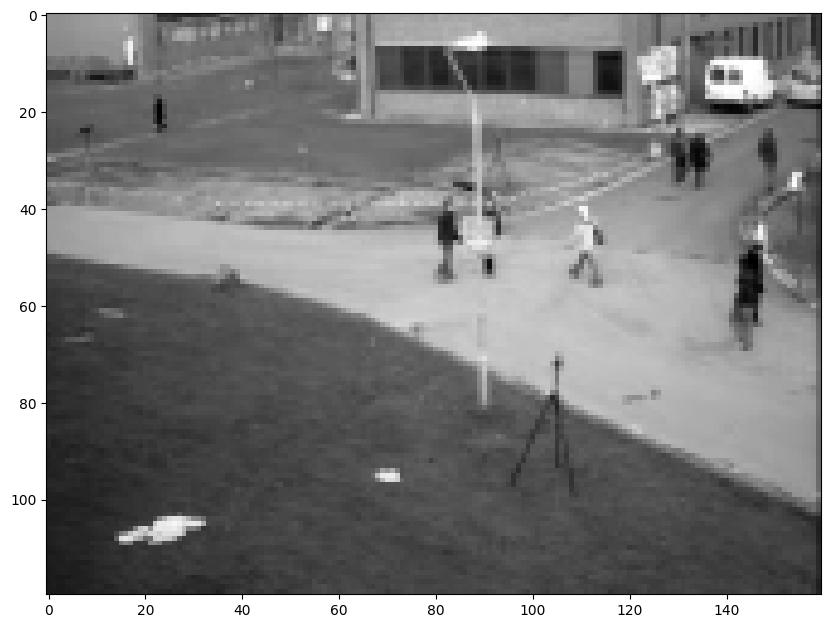

In [ ]:
plt.imshow(np.reshape(A[:, 140], dims), cmap='gray')

Let's see what the matrix A looks like

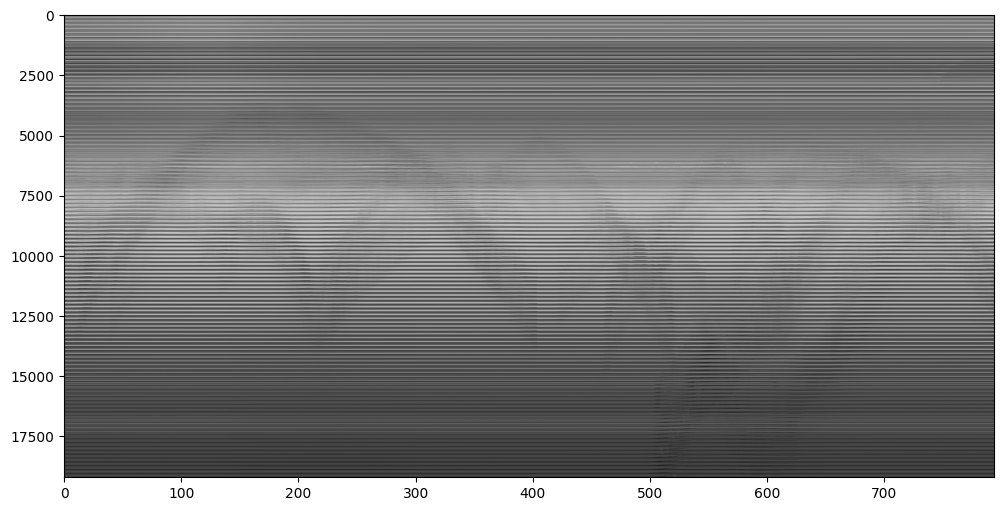

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(A, cmap='gray', aspect='auto')

We have to understand what are the wavy black lines and what are instead the horizontal ones

In order to understand we apply the SVD to our matrix

In [ ]:
U, s, VT = np.linalg.svd(A, full_matrices=False)
U.shape, s.shape, VT.shape

((19200, 794), (794,), (794, 794))

We check that they're a decomposition of A (of course they are)

In [ ]:
A_reconstructed = U @ np.diag(s) @ VT
np.allclose(A, A_reconstructed)

True

Since the background is more or less constant during the video (the horizontal lines of A) we suppose that the background could be reconstructed using a few singular values

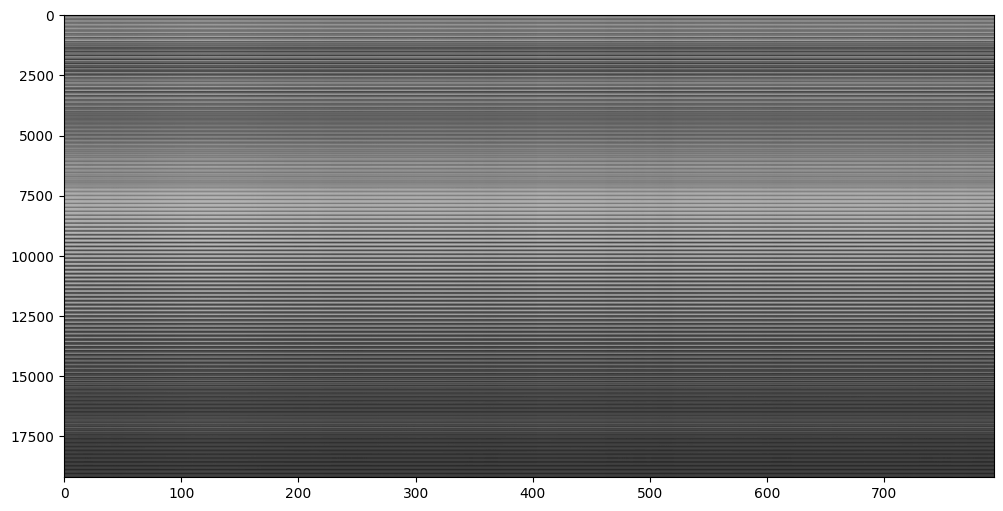

In [ ]:
n_singular_values = 1
background = U[:, 0:n_singular_values] * s[0] * VT[0:n_singular_values, :]
plt.figure(figsize=(12,6))
plt.imshow(background, cmap='gray', aspect='auto')

Now we can visualize the video without the background

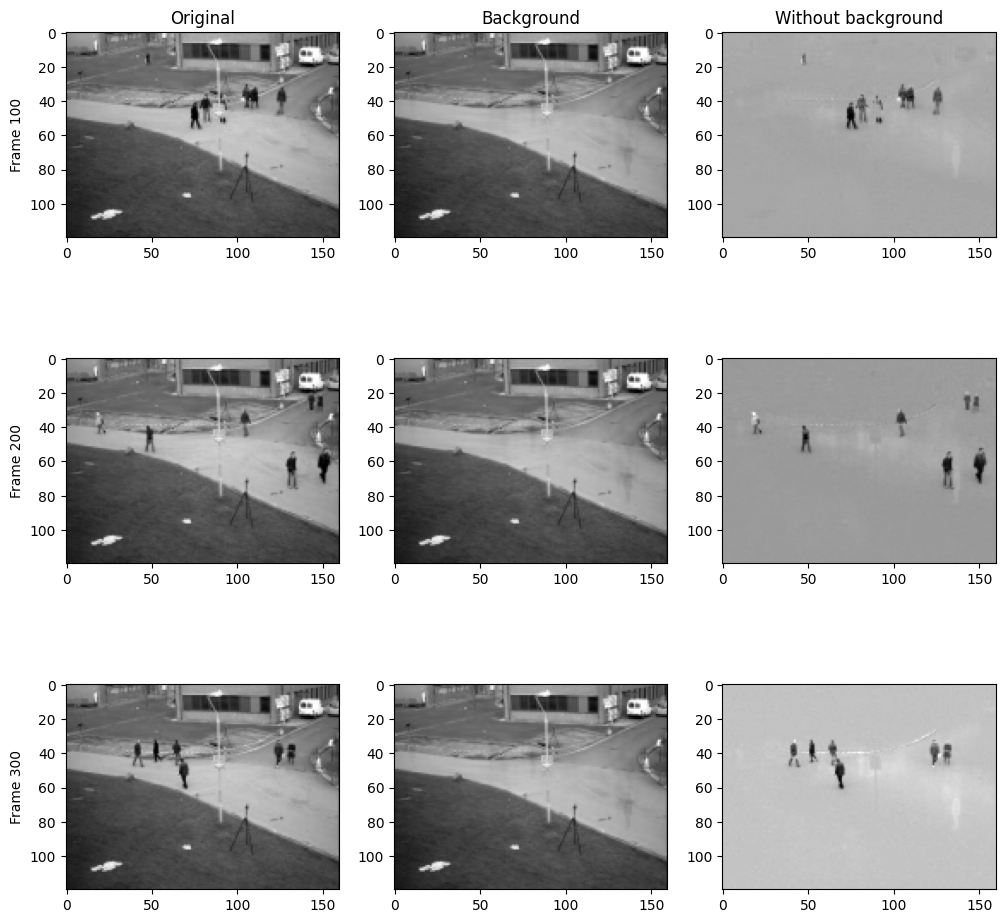

In [ ]:
def plot_frames(A, background, time_ids):
  fig, axs = plt.subplots(len(time_ids), 3, figsize=(12, 4*len(time_ids)))
  for i, time_id in enumerate(time_ids):
    axs[i, 0].imshow(np.reshape(A[:, time_id], dims), cmap='gray')
    axs[i, 1].imshow(np.reshape(background[:, time_id], dims), cmap='gray')
    axs[i, 2].imshow(np.reshape(A[:, time_id] - background[:, time_id], dims), cmap='gray')

    axs[i, 0].set_ylabel(f"Frame {time_id}")
    if i==0:
      axs[0, 0].set_title("Original")
      axs[0, 1].set_title("Background")
      axs[0, 2].set_title("Without background")

time_ids = [100, 200, 300]
plot_frames(A, background, time_ids)
